In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

# Load your dataset
df = pd.read_csv("Amazon_bestsellers_items_2025.csv")

# Keep relevant columns
df = df[['rank', 'product_price', 'product_star_rating', 'product_num_ratings']]

# Convert product_price to numeric (remove currency symbols, commas)
df['product_price'] = df['product_price'].replace('[\$,₹,]', '', regex=True).replace('', np.nan)
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

print(df.head())


<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_8472\733219019.py:16: SyntaxWarning: invalid escape sequence '\$'
  df['product_price'] = df['product_price'].replace('[\$,₹,]', '', regex=True).replace('', np.nan)


   rank  product_price  product_star_rating  product_num_ratings
0     1          469.0                  4.3              13324.0
1     2          370.0                  4.4               2291.0
2     3         1799.0                  4.5                388.0
3     4           94.0                  4.1               9630.0
4     5         1699.0                  4.4               5783.0


In [4]:
# Features & Target
X = df[['rank', 'product_price', 'product_num_ratings']]
y = df['product_star_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (optional but helps Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Linear Regression ----
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

print("🔹 Linear Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

# ---- Random Forest Regressor ----
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("\n🔹 Random Forest Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


🔹 Linear Regression Results:
RMSE: 0.6387270479341136
R2 Score: -0.017594892988326505

🔹 Random Forest Regression Results:
RMSE: 0.6323503865450203
R2 Score: 0.0026217791677800584


In [6]:
# Create binary target
df['top_product'] = (df['rank'] <= 20).astype(int)

X = df[['product_price', 'product_num_ratings', 'product_star_rating']]
y = df['top_product']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Logistic Regression ----
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ---- Random Forest Classifier ----
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\n🔹 Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Logistic Regression Results:
Accuracy: 0.7954545454545454
              precision    recall  f1-score   support

           0       0.80      0.99      0.88        70
           1       0.50      0.06      0.10        18

    accuracy                           0.80        88
   macro avg       0.65      0.52      0.49        88
weighted avg       0.74      0.80      0.72        88


🔹 Random Forest Classifier Results:
Accuracy: 0.7954545454545454
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        70
           1       0.50      0.17      0.25        18

    accuracy                           0.80        88
   macro avg       0.66      0.56      0.57        88
weighted avg       0.75      0.80      0.75        88



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


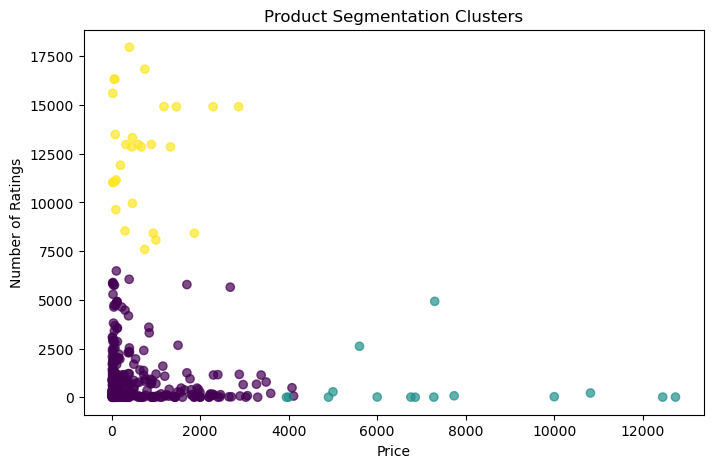

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['product_price', 'product_num_ratings', 'product_star_rating']]

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,5))
plt.scatter(df['product_price'], df['product_num_ratings'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Price")
plt.ylabel("Number of Ratings")
plt.title("Product Segmentation Clusters")
plt.show()


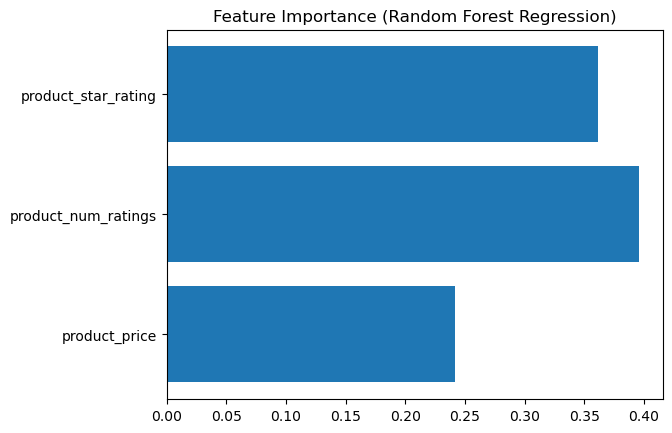

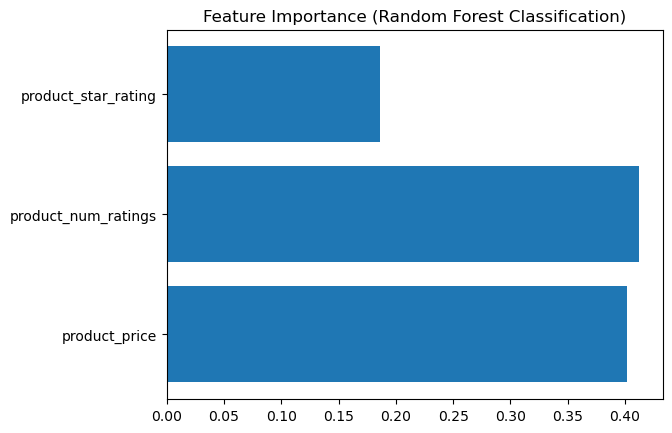

In [10]:
import matplotlib.pyplot as plt

# Feature importance for Regression
importances_reg = rf_reg.feature_importances_
features_reg = X.columns
plt.barh(features_reg, importances_reg)
plt.title("Feature Importance (Random Forest Regression)")
plt.show()

# Feature importance for Classification
importances_clf = rf_clf.feature_importances_
features_clf = X.columns
plt.barh(features_clf, importances_clf)
plt.title("Feature Importance (Random Forest Classification)")
plt.show()


In [40]:
import pandas as pd

# Example: if you already have your dataframe as df
# df = pd.read_csv("your_file.csv")

# Features we want to clean
features = ['product_price', 'product_rating', 'product_num_ratings']

# --- Clean product_price ---
df['product_price'] = (
    df['product_price']
    .astype(str)                              # ensure string
    .str.replace('₹', '', regex=False)        # remove rupee symbol
    .str.replace(',', '', regex=False)        # remove commas
    .str.replace(r'[^\d.]', '', regex=True)   # remove non-numeric
)

# Convert to numeric safely (invalid -> NaN)
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

# --- Clean product_rating ---
df['product_rating'] = pd.to_numeric(df['product_rating'], errors='coerce')

# --- Clean product_num_ratings ---
df['product_num_ratings'] = (
    df['product_num_ratings']
    .astype(str)
    .str.replace(',', '', regex=False)        # remove commas
)
df['product_num_ratings'] = pd.to_numeric(df['product_num_ratings'], errors='coerce')

# --- Handle missing values (optional, depends on your use case) ---
df[features] = df[features].fillna(0)   # replace NaN with 0 (or dropna())

print(df[features].head())


KeyError: 'product_rating'

In [42]:
print(df.columns.tolist())


['Unnamed: 0', 'rank', 'asin', 'product_title', 'product_price', 'product_star_rating', 'product_num_ratings', 'product_url', 'product_photo', 'rank_change_label', 'country', 'page']


In [44]:
import pandas as pd

# --- Clean product_price ---
df['product_price'] = (
    df['product_price'].astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.replace(r'[^\d.]', '', regex=True)   # remove non-numeric except dot
)
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

# --- Clean product_star_rating ---
df['product_star_rating'] = pd.to_numeric(df['product_star_rating'], errors='coerce')

# --- Clean product_num_ratings ---
df['product_num_ratings'] = (
    df['product_num_ratings'].astype(str)
    .str.replace(',', '', regex=False)
)
df['product_num_ratings'] = pd.to_numeric(df['product_num_ratings'], errors='coerce')

# --- Drop rows where price or rating are missing ---
df = df.dropna(subset=['product_price', 'product_star_rating'])

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           915 non-null    int64  
 1   rank                 915 non-null    int64  
 2   asin                 915 non-null    object 
 3   product_title        915 non-null    object 
 4   product_price        915 non-null    float64
 5   product_star_rating  915 non-null    float64
 6   product_num_ratings  915 non-null    float64
 7   product_url          915 non-null    object 
 8   product_photo        915 non-null    object 
 9   rank_change_label    0 non-null      float64
 10  country              915 non-null    object 
 11  page                 915 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 92.9+ KB
None
   Unnamed: 0  rank        asin  \
0           0     1  B073VKKNN9   
1           1     2  B07PQZJ6Y8   
2           2     3  B0D1KL